In [89]:
#(1) EX_6_Bayes_Kaggle
#https://www.kaggle.com/dskagglemt/breast-cancer-using-naive-bayes
#MAYANK TRIPATHI · 1Y AGO · 883 VIEWS
#Breast Cancer using Naive Bayes
#211102:ML
print('211102:ML:breast_cancer_data: Bayes Regression')
import datetime
print(datetime.datetime.now() )

211102:ML:breast_cancer_data: Bayes Regression
2022-11-08 06:33:54.030341


In [90]:
#(2)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LinearRegression

In [91]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer
#内容を確認する（ざっと見る）

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
#(4)
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
#(4)
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [94]:
#(5)#繰り返しの再確認：各要素を今後使用するので、
#breast_cancer.data#### This is our actual data.
#breast_cancer.target
breast_cancer.target_names###診断結果となるラベル（正解）；重要 malignant=悪性；benign＝良性
#breast_cancer.DESCR
breast_cancer.feature_names###重要
breast_cancer.filename
breast_cancer.data.shape
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [95]:
##(6) #Create Dataframe¶（別紙の説明を参照すること）
#Create dataframe out of the keys which are intreset to us.
df = pd.DataFrame(
np.c_[breast_cancer.data, breast_cancer.target],
columns = [list(breast_cancer.feature_names)+ ['target']]
)


In [96]:
#(7) fataframe に編集した下結果のデータ構造を確認する、はじめの 5 行
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [97]:
#(8) 終わりの 5 行
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [98]:
#(9) 要約統計量（平均、標準偏差、最小値、25 パ-センタイル等）を表示
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [99]:
#(10) .info()で情報が出る
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [100]:
#(11) Split the data into X and y¶（別紙の説明を参照すること）
X = df.iloc[:, 0:-1]##左がコロン：なので、任意の行＝全行、右は 0 から-1 までで-1 は最後を除くことを意味する
##X = df.iloc[:, 0-30] と同じ意味になる（全部で 31 列あり、そのうち 0 列から 29 列まで取り出す）
y = df.iloc[:,-1]

In [101]:
#(12) 形状の確認
X.shape, y.shape

((569, 30), (569,))

In [102]:
#(13) データ X,y を train80%ｔｏ test20%に分ける:random_state は乱数のシード（種）の値
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)


In [103]:
#(14) 分割を確認
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((455, 30), (455,), (114, 30), (114,))

In [104]:
#(15) Gaussian Naive Bayes¶
clf = GaussianNB()

In [105]:
#(16) 学習
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [106]:
#(17) 評価値、score は決定係数
clf.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.9210526315789473

In [107]:
#(18)The display.max_columns option controls the number of columns to be printed. It receives an int or None (to print all the columns):
#部分表示でなく、全データを表示させる
pd.set_option('display.max_columns', None)

In [108]:
#(19) # print(df.iloc[99]) ##99 番目の患者のデータを、99 から 100-1 までのデータとして見る
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0.0


In [109]:
#(20) 99 番目の患者のデータ値を転記する
patient1 = [14.42,19.77,94.48,642.5,0.09752,0.1141,0.9388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.04452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]
patient1

[14.42,
 19.77,
 94.48,
 642.5,
 0.09752,
 0.1141,
 0.9388,
 0.05839,
 0.1879,
 0.0639,
 0.2895,
 1.851,
 2.376,
 26.85,
 0.008005,
 0.02895,
 0.03321,
 0.01424,
 0.01462,
 0.04452,
 16.33,
 30.86,
 109.5,
 826.4,
 0.1431,
 0.3026,
 0.3194,
 0.1565,
 0.2718,
 0.09353]

In [110]:
#(21) Need to convert the patient1 dataset into 2-Dimension.
patient1 = np.array([patient1])
patient1

array([[1.442e+01, 1.977e+01, 9.448e+01, 6.425e+02, 9.752e-02, 1.141e-01,
        9.388e-01, 5.839e-02, 1.879e-01, 6.390e-02, 2.895e-01, 1.851e+00,
        2.376e+00, 2.685e+01, 8.005e-03, 2.895e-02, 3.321e-02, 1.424e-02,
        1.462e-02, 4.452e-02, 1.633e+01, 3.086e+01, 1.095e+02, 8.264e+02,
        1.431e-01, 3.026e-01, 3.194e-01, 1.565e-01, 2.718e-01, 9.353e-02]])

In [111]:
#(22)悪性化両性か予測（診断）するとどうなるか（どういう出力か）、調べる
clf.predict(patient1)


array([0.])

In [112]:
#(23)悪性化両性か予測（診断）する
pred = clf.predict(patient1)

if pred[0] == 0:
    print("Patient is suffering from Cancer (Malignant Tumor)")
else:
    print("Patient has no Cancer (Benign)")


Patient is suffering from Cancer (Malignant Tumor)


In [113]:
#(24)確率で表示する Probability¶ Lets see the probability of the prediction.
#判定前の数字を表示する（だけのこと）
pred_prob = clf.predict_proba(patient1)
pred_prob

array([[1.00000000e+00, 2.72313735e-49]])

In [114]:
#(25)
print("pred_prob.ndim=",pred_prob.ndim)
print("pred_prob[0]=",pred_prob[0])

pred_prob.ndim= 2
pred_prob[0]= [1.00000000e+00 2.72313735e-49]


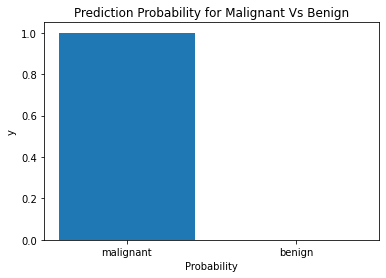

In [115]:
#(26)Visualize it
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(breast_cancer.target_names, pred_prob[0])
plt.title('Prediction Probability for Malignant Vs Benign')
plt.xlabel('Probability')
plt.xticks(pred_prob[0])
plt.ylabel('y')
plt.show()


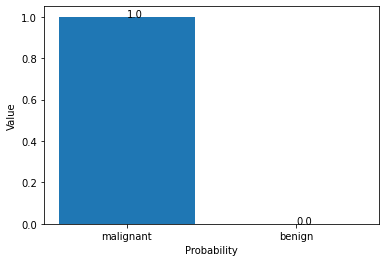

In [116]:
#(27)Annotate the values
line = plt.bar(breast_cancer.target_names,pred_prob[0])
plt.xlabel('Probability')
plt.ylabel("Value")
for i in range(2):
    plt.annotate(str(round(pred_prob[0][i],2)), xy=(breast_cancer.target_names[i],pred_prob[0][i]))
plt.show()